# End to End Deep Learning model for Self Driving Car

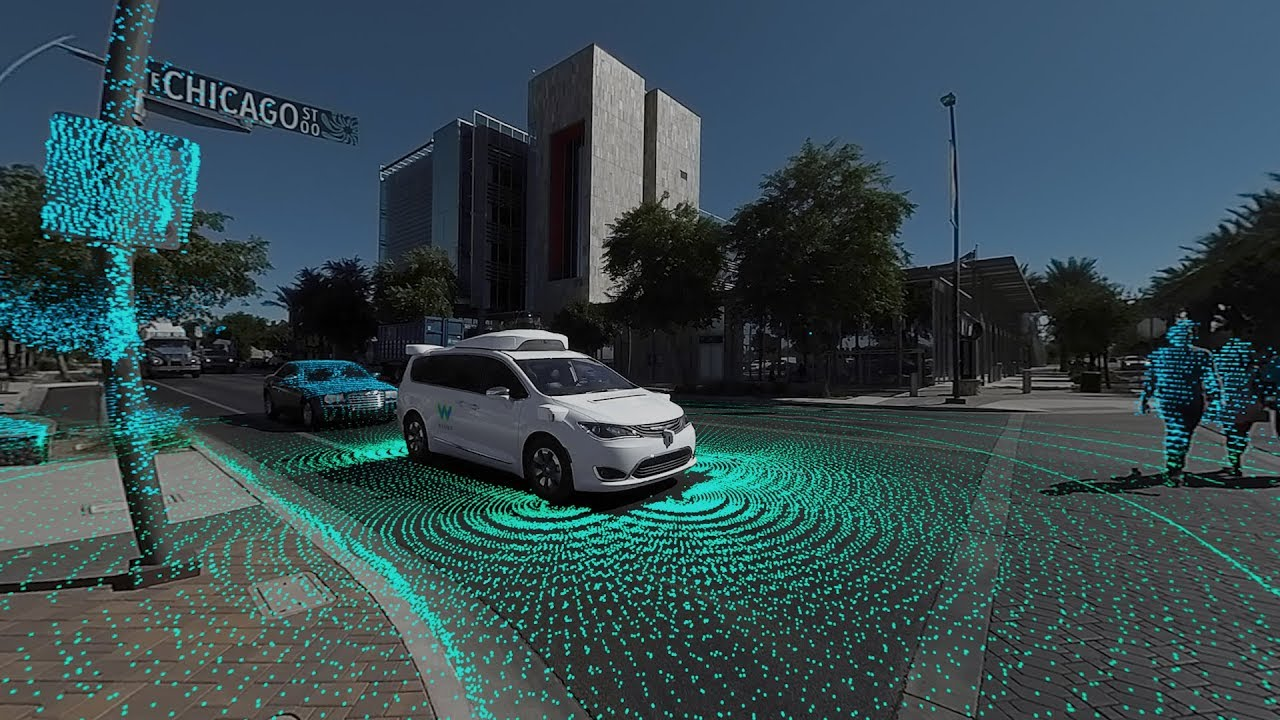

Today, we can see fully self-driving cars on the road. Some call it a fad , while some call it a marvel of technology. I know, driverless vehicles is quite an impossible concept to believe in.
These vehicles carry passengers from a point to another point and are promised to reduce fuel consumption, provide passenger a safer journey and reduce 95% errors caused by humans.

## Problem definition

We are building a minimal version of self driving car using a front camera view. Our CNN end to end model predicts the steering angles for a smooth ride. Predicting steering angle can be considered as a regression problem.

## Dataset

There are total 45406 images in the dataset along with their steering angles for training. 

## Train and Test split

We will split the dataset in a ratio of 80:20 sequentially.

## Objective

Our objective is to predict the correct steering angle for self driving car. Here our loss is MSE ( mean squared loss ) and we will try to reduce this to as low as possible.

In [1]:
# read images and steering angles from driving_dataset folder 

from __future__ import division

import os
import numpy as np
import random

from scipy import pi
from itertools import islice

DATA_FOLDER = r"C:\Users\sweta\OneDrive\Desktop\DL Projects\Self driving cars\Autopilot\driving_dataset"
TRAIN_FILE = os.path.join(DATA_FOLDER, r'data.txt')

split = 0.8
x = []
y = []
with open (TRAIN_FILE) as fp:
    LIMIT = None
    for line in islice(fp, LIMIT):
        path, angle = line.strip().split()
        full_path = os.path.join(DATA_FOLDER, path)
        x.append(full_path)
        
        #converting angles from degrees to radians
        y.append(float(angle) * pi / 180)  # As 360 degrees = 2 radians

y = np.array(y)
print("completed processing data.txt")

split_index = int(len(y) * 0.8)

train_y = y[:split_index]
test_y = y[split_index:]

completed processing data.txt


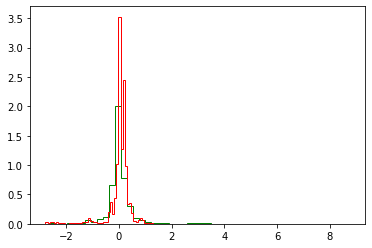

In [2]:
import numpy 

# pdf of train and test 'y' values
import matplotlib.pyplot as plt
plt.hist(train_y, bins=50, density=True,color='green', histtype = 'step')
plt.hist(test_y, bins=50,density = True,color = 'red', histtype = 'step')
plt.show()

Observation :
   - Train y's and Test y's are not completely overlapping.
   - There is a some difference between train and test data
   - I oberserved that, most often the steering angle is 0 radian, as most roads are leading straight.
   - Most of the values lie between -2 to +2.
   - This observation is in radians.

Now, we build a very simple base line model.

##  Base Line Model

In [3]:
# I will take predicted value yi hat test = mean(yi train)
# Remember this is a regression problem, becoz our input is sequence of images and our output is a real value.
# Performance metric of Regression problem is MSE ( mean squared error )

train_mean_y = np.mean(train_y)

print('Test_MSE(MEAN) : %f' % np.mean(np.square(test_y - train_mean_y)))
print('Test_MSE(ZERO) : %f' % np.mean(np.square(test_y - 0.0)))

Test_MSE(MEAN) : 0.191127
Test_MSE(ZERO) : 0.190891


Observation :
- Ideal Mean Square Value =  0, as most of values are close to 0 radians.
- So, any model i train should have MSE on test data less than 0.19.